In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas
import inspect
from datetime import datetime
import seaborn as sns
import glob
from os.path import basename
sns.set_context('poster')
import re
import csv

## Load files

In [2]:
df = pandas.read_csv('../data/1997-2016-DEDUPED.csv')

/usr/local/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (0,3,4,6,13,16,17,18,20,22,29,31,32,33,34,35,37,41,44,45,47,51,53,55,57,96,129,137) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.iyear

0        1997.0
1        1997.0
2        1997.0
3        1997.0
4        1997.0
5        1997.0
6        1997.0
7        1997.0
8        1997.0
9        1997.0
10       1997.0
11       1997.0
12       1997.0
13       1997.0
14       1997.0
15       1997.0
16       1997.0
17       1997.0
18       1997.0
19       1997.0
20       1997.0
21       1997.0
22       1997.0
23       1997.0
24       1997.0
25       1997.0
26       1997.0
27       1997.0
28       1997.0
29       1997.0
          ...  
97051    2016.0
97052    2016.0
97053    2016.0
97054    2016.0
97055    2016.0
97056    2016.0
97057    2016.0
97058    2016.0
97059    2016.0
97060    2016.0
97061    2016.0
97062    2016.0
97063    2016.0
97064    2016.0
97065    2016.0
97066    2016.0
97067    2016.0
97068    2016.0
97069    2016.0
97070    2016.0
97071    2016.0
97072    2016.0
97073    2016.0
97074    2016.0
97075    2016.0
97076    2016.0
97077    2016.0
97078    2016.0
97079    2016.0
97080    2016.0
Name: iyear, dtype: floa

## Suicide attacks over time


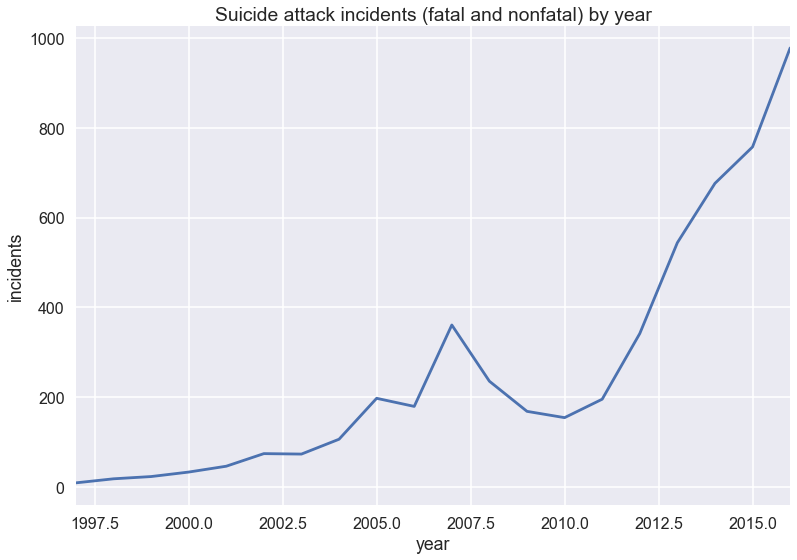

In [13]:
df[(df.suicide == 1)].groupby(['iyear']).eventid.count().plot()
plt.ylabel("incidents")
plt.title("Suicide attack incidents (fatal and nonfatal) by year")
plt.xlabel('year')

In [ ]:
## export the above data
df[(df.suicide == 1)].groupby(['iyear']).eventid.count().to_csv('../manchester/suicide-attacks-1970-2016.csv')

In [ ]:
df[(df.suicide == 1) & (df.iyear==2013)][['iyear', 'imonth', 'iday', 'nkill','summary','city']].to_csv('../manchester/test.csv')

In [ ]:
df[(df.suicide == 1)].groupby(['iyear']).nkill.sum().plot()
plt.ylabel("Deaths")
plt.title("Deaths by suicide attack incidents by year")
plt.xlabel('year')

In [ ]:
## export the above data
df[(df.suicide == 1)].groupby(['iyear']).nkill.sum().to_csv('../manchester/suicide-attacks-1970-2016-nkilled.csv')

## % of suicide attacks claimed by ISIL

In [ ]:
df[(df.suicide == 1)].groupby(['iyear']).eventid.count().plot() 
df[(df.suicide == 1) & (df.gname == 'Islamic State of Iraq and the Levant (ISIL)')].groupby(['iyear']).eventid.count().plot()
plt.legend(['all suicide attacks','suicide attacks with group name ISIL'])
plt.title("Suicide attacks (fatal & nonfatal)")

## Top areas that are impacted by suicide attack

In [8]:
df[(df.suicide == 1)&(df.iyear==2016)].country_txt.value_counts()

Series([], Name: country_txt, dtype: int64)

### Suicide attacks by region

In [4]:
df[(df.suicide == 1)&(df.iyear==2016)].region_txt.value_counts()

Middle East & North Africa    689
South Asia                    148
Sub-Saharan Africa            128
Southeast Asia                  4
Eastern Europe                  4
Western Europe                  2
Central Asia                    2
Name: region_txt, dtype: int64

In [5]:
print df[(df.suicide == 1)&(df.iyear>2006)].eventid.count()
df[(df.suicide == 1)&(df.iyear>2006)].region_txt.value_counts()

4413


Middle East & North Africa    2411
South Asia                    1461
Sub-Saharan Africa             453
Eastern Europe                  49
Southeast Asia                  12
East Asia                       11
Western Europe                   6
Central Asia                     6
North America                    4
Name: region_txt, dtype: int64

In [17]:
df[(df.suicide == 1)&(df.iyear>2006)][['iyear', 'imonth', 'iday', 'nkill','summary','city','region_txt']].to_csv('../manchester/suicide-attacks-2007-2016.csv', encoding='utf8')

In [ ]:
#all attacks
df[(df.iyear==2016)].region_txt.value_counts()

### Previous suicide attacks in the UK (since 1970)

In [15]:
# How many suicide attacks?
print df.iyear.min()
df[(df.country_txt=='United Kingdom') & (df.suicide ==1)].groupby(['iyear']).eventid.count()

1997.0


iyear
2005.0    1
2007.0    1
Name: eventid, dtype: int64

In [ ]:
df[(df.country_txt=='United Kingdom') & (df.suicide ==1)][['city', 'country_txt', 'suicide', 'gname',
                                                           'claimed', 'guncertain1',
                                                           'iyear', 'imonth','iday', 'attacktype1_txt',
                                                          'motive', 'nkill','nkillter','nwound','nperps',
                                                          'target1', 'summary']].to_csv("../manchester/uk-suicide-attacks.csv", 
                                                                                       encoding='utf8')

In [ ]:
print "\n".join(df.columns)

In [ ]:
df[(df.country_txt=='United Kingdom')].groupby('iyear').nkill.sum()

In [ ]:
# UK ONLY: Attacks claimed by ISIL by year
df[df.gname == 'Islamic State of Iraq and the Levant (ISIL)'].groupby(['iyear','claimed']).eventid.count() #.to_csv('../data/ISIL/isil-claimed-by-year.csv', header=True)

In [ ]:
# United Kingdom gname 
df[df.country_txt=='United Kingdom'].groupby(['iyear', 'gname']).eventid.count()#.to_csv('../data/ISIL/uk-gnames.csv')

In [ ]:
# United Kingdom attacks target/perp
df[df.country_txt=='United Kingdom'].groupby(['iyear', 'gname','target1']).eventid.count()#.to_csv('../data/ISIL/uk-target-perp.csv', encoding='utf8',header=True)

In [ ]:
# Only fatal attacks in UK
df[(df.country_txt=='United Kingdom')&(df.nkill > 0)].groupby(['iyear', 'gname']).datetime.count().to_csv('../data/ISIL/uk-gnames-fatal-attacks-only.csv')

In [ ]:
# United Kingdom attacks by weapon type ALL
df[df.country_txt=='United Kingdom'].groupby(['iyear', 'weaptype1_txt']).datetime.count().to_csv('../data/ISIL/uk-weapon-type-ALL.csv')

In [ ]:
# United Kingdom attacks by weapon type FATAL
c].groupby(['iyear', 'weaptype1_txt']).datetime.count().to_csv('../data/ISIL/uk-weapon-type-fatal.csv')

In [ ]:
 df.groupby(['iyear', 'suicide']).datetime.count()

In [ ]:
df.groupby(['iyear', 'suicide']).eventid.count()

In [ ]:
df[df.gname == 'Islamic State of Iraq and the Levant (ISIL)'].groupby('iyear').datetime.count()

In [ ]:
df[df.gname == 'Islamic State of Iraq and the Levant (ISIL)'][['claimed','compclaim','guncertain1']].count()

In [ ]:
# Attacks claimed by ISIL by year
df[df.gname == 'Islamic State of Iraq and the Levant (ISIL)'].groupby(['iyear','claimed']).datetime.count().to_csv('../data/isil-claimed-by-year.csv', header=True)

In [ ]:
# Attacks claimed by ISIL but uncertain by year
df[(df.gname == 'Islamic State of Iraq and the Levant (ISIL)')&(df.claimed == 1)].groupby(['iyear','guncertain1']).datetime.count().to_csv("../data/ISIL/isil-claimed-guncertain-by-year.csv",header=True)

In [ ]:
 # Attacks claimed by ISIL but uncertain by year in Western Europe
df[(df.gname == 'Islamic State of Iraq and the Levant (ISIL)')&(df.region==8) &(df.claimed == 1) ].groupby(['iyear','guncertain1']).datetime.count()

## All the data

In [ ]:
df_ALL = pandas.read_excel('../data/globalterrorismdb_0616dist.xlsx')

In [ ]:
df_ALL[(df_ALL.country_txt=='United Kingdom') & (df_ALL.suicide ==1)].groupby(['iyear', 'suicide']).eventid.count().to_csv('../data/ISIL/uk-suicide-attack.csv',header=True)

In [ ]:
df_ALL[(df_ALL.suicide == 1)].groupby(['iyear']).eventid.count().to_csv('../data/ISIL/rise-of-suicide-attacks-global.csv', header=True)

In [ ]:
#deadliness of uk attacks
df_ALL[(df_ALL.country_txt=='United Kingdom')].groupby(['iyear','nkill']).eventid.count().to_csv('../data/ISIL/uk-nkill.csv', header=True)

In [ ]:
df_ALL[(df_ALL.suicide == 1)].groupby(['iyear']).eventid.count().plot()
plt.title('Suicide attacks over time (all attacks fatal and nonfatal)')

In [ ]:
df_ALL[(df_ALL.suicide == 1)].country_txt.value_counts()